<a href="https://colab.research.google.com/github/dikshasinghhh/Clustering/blob/main/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [ ]:
data = pd.read_csv('wine-clustering.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Feature Scaling

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# GMM

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)

# Hierarchical Clustering (Agglomerative)

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(data_scaled)

# Visualizing


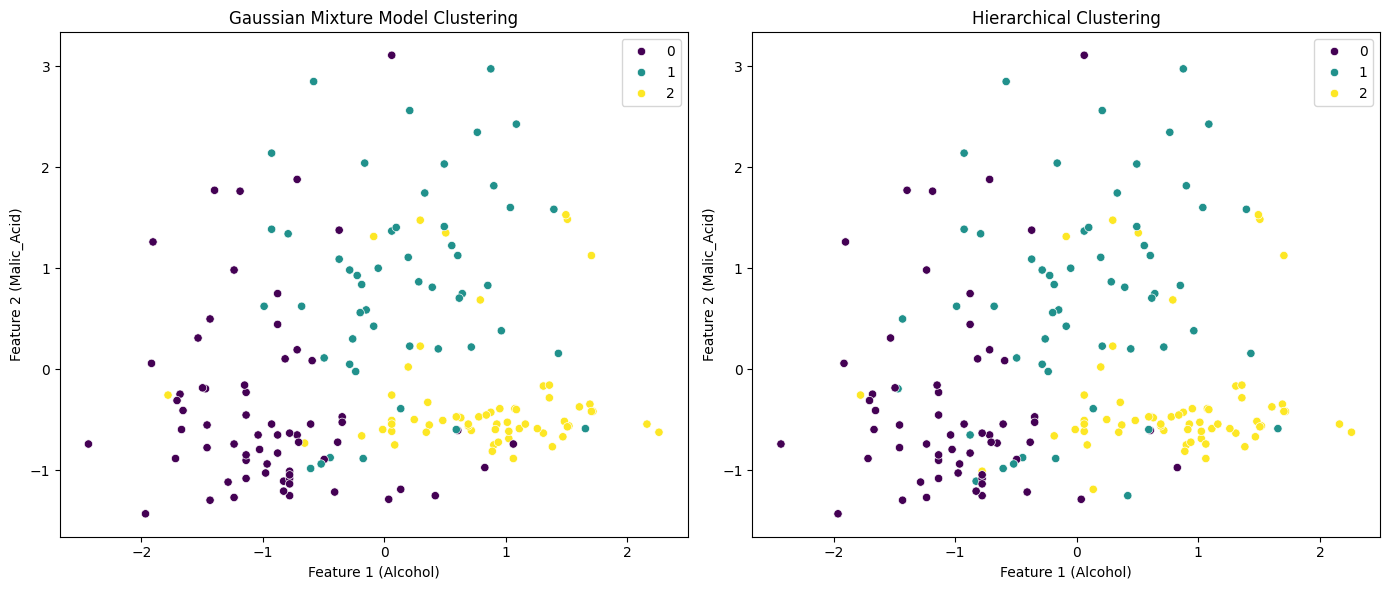

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gaussian Mixture Model clusters
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=gmm_labels, palette='viridis', ax=ax1)
ax1.set_title("Gaussian Mixture Model Clustering")
ax1.set_xlabel("Feature 1 (Alcohol)")
ax1.set_ylabel("Feature 2 (Malic_Acid)")

# Hierarchical Clustering clusters
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=hc_labels, palette='viridis', ax=ax2)
ax2.set_title("Hierarchical Clustering")
ax2.set_xlabel("Feature 1 (Alcohol)")
ax2.set_ylabel("Feature 2 (Malic_Acid)")

plt.tight_layout()
plt.show()